In [3]:
import joblib
import os.path
from PIL import Image
import random
from matplotlib.pyplot import imread, imshow, imsave
import numpy as np
import cv2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from random import seed
from random import randint
import math
import statistics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Augmentation

In [ ]:
path='/content/gdrive/MyDrive/CleanCoins3/'

#--------------------------  1 Rupee ---------------------------------
coin='1_Rupee'  # coin type
idx=count=30    #  total number of coins of this type
#  Rotate
for i in range(0,count):
  original  = Image.open( path + coin + str(i) + '.jpg' )
  #Rotate
  for deg in range(10,360,10):
    rot = original.rotate(deg)
    rot.save(path + coin + str(idx) + '.jpg') 
    idx+=1

#  Blur
min_size = 11  #blur kernel size
for i in range(0,idx):
    original = imread(path + coin + str(i) + '.jpg' )
    addition = random.choice((0, 2, 4, 6, 8, 10, 12))
    size = min_size + addition
    kernel_size = (size, size)
    img = cv2.GaussianBlur(original, kernel_size, 0)
    imsave(path + coin + str(idx) + '.jpg'  ,  img)
    idx+=1


#--------------------------  2 Rupee ---------------------------------
coin='2_Rupee'  # coin type
idx=count=30    #  total number of coins of this type
#  Rotate
for i in range(0,count):
  original  = Image.open( path + coin + str(i) + '.jpg' )
  #Rotate
  for deg in range(10,360,10):
    rot = original.rotate(deg)
    rot.save(path + coin + str(idx) + '.jpg') 
    idx+=1

#  Blur
min_size = 11  #blur kernel size
for i in range(0,idx):
    original = imread(path + coin + str(i) + '.jpg' )
    addition = random.choice((0, 2, 4, 6, 8, 10, 12))
    size = min_size + addition
    kernel_size = (size, size)
    img = cv2.GaussianBlur(original, kernel_size, 0)
    imsave(path + coin + str(idx) + '.jpg'  ,  img)
    idx+=1

#--------------------------  5 Rupee ---------------------------------
coin='5_Rupee'  # coin type
idx=count=30    #  total number of coins of this type
#  Rotate
for i in range(0,count):
  original  = Image.open( path + coin + str(i) + '.jpg' )
  #Rotate
  for deg in range(10,360,10):
    rot = original.rotate(deg)
    rot.save(path + coin + str(idx) + '.jpg') 
    idx+=1

#  Blur
min_size = 11  #blur kernel size
for i in range(0,idx):
    original = imread(path + coin + str(i) + '.jpg' )
    addition = random.choice((0, 2, 4, 6, 8, 10, 12))
    size = min_size + addition
    kernel_size = (size, size)
    img = cv2.GaussianBlur(original, kernel_size, 0)
    imsave(path + coin + str(idx) + '.jpg'  ,  img)
    idx+=1

#--------------------------  10 Rupee ---------------------------------
coin='10_Rupee'  # coin type
idx=count=30    #  total number of coins of this type
#  Rotate
for i in range(0,count):
  original  = Image.open( path + coin + str(i) + '.jpg' )
  #Rotate
  for deg in range(10,360,10):
    rot = original.rotate(deg)
    rot.save(path + coin + str(idx) + '.jpg') 
    idx+=1

#  Blur
min_size = 11  #blur kernel size
for i in range(0,idx):
    original = imread(path + coin + str(i) + '.jpg' )
    addition = random.choice((0, 2, 4, 6, 8, 10, 12))
    size = min_size + addition
    kernel_size = (size, size)
    img = cv2.GaussianBlur(original, kernel_size, 0)
    imsave(path + coin + str(idx) + '.jpg'  ,  img)
    idx+=1

"path='/content/gdrive/MyDrive/CleanCoins3/'\n\n#--------------------------  1 Rupee ---------------------------------\ncoin='1_Rupee'  # coin type\nidx=count=30    #  total number of coins of this type\n#  Rotate\nfor i in range(0,count):\n  original  = Image.open( path + coin + str(i) + '.jpg' )\n  #Rotate\n  for deg in range(10,360,10):\n    rot = original.rotate(deg)\n    rot.save(path + coin + str(idx) + '.jpg') \n    idx+=1\n\n#  Blur\nmin_size = 11  #blur kernel size\nfor i in range(0,idx):\n    original = imread(path + coin + str(i) + '.jpg' )\n    addition = random.choice((0, 2, 4, 6, 8, 10, 12))\n    size = min_size + addition\n    kernel_size = (size, size)\n    img = cv2.GaussianBlur(original, kernel_size, 0)\n    imsave(path + coin + str(idx) + '.jpg'  ,  img)\n    idx+=1\n\n\n#--------------------------  2 Rupee ---------------------------------\ncoin='2_Rupee'  # coin type\nidx=count=30    #  total number of coins of this type\n#  Rotate\nfor i in range(0,count):\n  orig

#Dataset

In [11]:
"""
0-9:    1   0-719
10-15:  2   0-431
16-26:  5   0-791
27-31:  10  0-287
"""

X=np.zeros((8640,64,64,3))
Y=np.zeros((8640))
outpath='./CleanCoins3/'
ind=0
for i in range(2160):
  img = cv2.imread(outpath+"1_Rupee"+str(i)+".jpg")  
  X[ind]=cv2.resize(img,(64,64))
  Y[ind]="1"
  ind+=1
for i in range(2160):
  img = cv2.imread(outpath+"2_Rupee"+str(i)+".jpg")
  X[ind]=cv2.resize(img,(64,64))
  Y[ind]="2"
  ind+=1
for i in range(2160):
  img = cv2.imread(outpath+"5_Rupee"+str(i)+".jpg")
  X[ind]=cv2.resize(img,(64,64))
  Y[ind]="5"
  ind+=1
for i in range(2160):
  img = cv2.imread(outpath+"10_Rupee"+str(i)+".jpg") 
  X[ind]=cv2.resize(img,(64,64))
  Y[ind]="10"
  ind+=1

In [12]:
print(X.shape)

(8640, 64, 64, 3)


#Train-Test Split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.05, random_state=42)
print(xtrain.shape)
print(xtest.shape)

(8208, 64, 64, 3)
(432, 64, 64, 3)


#Feature Vector Extraction

In [14]:
feature_vectors=np.zeros((xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2]*xtrain.shape[3]))
for i in range(xtrain.shape[0]):
  feature_vectors[i]=xtrain[i].flatten()

#Model

In [ ]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(feature_vectors, ytrain)

#Save Model
filename = 'finalized_model.sav'
joblib.dump(model, filename)

In [8]:
#Load Saved Model
model = joblib.load('finalized_model.sav')

#Model Accuracy

Calculated Accuracy 1.0

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       111
         2.0       1.00      1.00      1.00       108
         5.0       1.00      1.00      1.00       114
        10.0       1.00      1.00      1.00        99

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



Text(89.18, 0.5, 'predicted label')

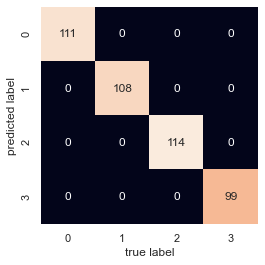

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

testFeatureVectors=np.zeros((xtest.shape[0],xtest.shape[1]*xtest.shape[2]*xtest.shape[3]))
for i in range(xtest.shape[0]):
  testFeatureVectors[i]=xtest[i].flatten()

ypred = model.predict(testFeatureVectors)

print("Calculated Accuracy",accuracy_score(ytest, ypred))
print()

print(metrics.classification_report(ypred, ytest))
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Circle Detection

Circles Detected = 4


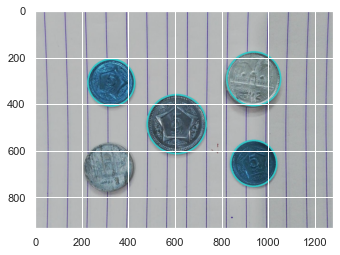

In [15]:
im="./Data_Test/1.jpg"

# Read image.
img = cv2.imread(im,1)

#----------  Detect Circles  -----------

grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(grey_img, (21,21),cv2.BORDER_DEFAULT)
# Apply Hough transform on the blurred image.
all_circles = cv2.HoughCircles(blurred_img, cv2.HOUGH_GRADIENT,0.9,120,param1=50,param2=30, minRadius = 60,maxRadius = 150)



if all_circles is not None:
    all_circles_rounded = np.uint16(np.around(all_circles))
    print('Circles Detected = '+ str(all_circles_rounded.shape[1]))
    #----------  Draw detected circles  -----------
    for i  in all_circles_rounded[0,:]:
      cv2.circle(img,  ( i[0],i[1]), i[2] , (50,200,200), 5)
    imshow(img,cmap='gray')
    
    #----------  Remove Background and create seperate images per coin  ------
    img = imread(im)  # reag again, coloured image
    coinImages=[]  # array of individua coin images 
    X, Y = np.ogrid[0:img.shape[0], 0:img.shape[1]]         #creates arrays of all x and y coordinates
    for i  in all_circles_rounded[0,:]:
      masked_img = img.copy()
      x=i[0]
      y=i[1]
      rad=i[2]
      mask = (X - y) ** 2 + (Y - x) ** 2 < rad** 2
      
      masked_img[~mask]=(0,0,0)
      #coinImages.append(masked_img)
    #----------  Crop Coin
      x=i[0]-i[2]   #  x -rad
      y=i[1]-i[2]    #  y -rad
      h=i[2]*2
      crop_img = masked_img[y:y+h, x:x+h]   #[y:y+h, x:x+w]
      coinImages.append(crop_img)

In [9]:
amount=0
for i in range(len(coinImages)):
    
#   # Creating our sharpening filter
#   filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# #   Applying cv2.filter2D function on our image
#   coinImages[i]=cv2.filter2D(coinImages[i],-1,filter)
    
  coinImages[i]=cv2.resize(coinImages[i],(64,64))
  input=coinImages[i].flatten().reshape(1, -1)
  label=model.predict(input)
  print(i,": ",label)
  amount+=int(label)
print("Total amount: ",amount)

0 :  [5.]
1 :  [5.]
2 :  [5.]
3 :  [2.]
Total amount:  17


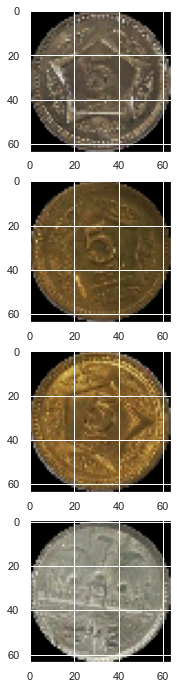

In [10]:
total=len(coinImages)
f, axarr = plt.subplots(total,1, figsize=(12, 12))
for i in range(total):
  axarr[i].imshow(coinImages[i], cmap='gray') 


In [ ]:
# amount=0
# for i in range(len(coinImages)):
#   # Creating our sharpening filter
#   #filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#   # Applying cv2.filter2D function on our image
#   #coinImages[i]=cv2.filter2D(coinImages[i],-1,filter)
#   coinImages[i]=cv2.resize(coinImages[i],(64,64))
#   input=coinImages[i].flatten().reshape(1, -1)
#   label=model.predict(input)
#   print(i,": ",label)
#   amount+=int(label)
# print("Total amount: ",amount)